In [30]:
!pip install ultralytics
# Importamos las librerías a utilizar
import cv2
from ultralytics import YOLO
from IPython.display import Image

import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [ ]:
!git clone https://github.com/justshivam/Cat-And-Dog-Prediction.git

In [ ]:
"""
Diferencia entre Localización de Objetos y Clasificación de Imágenes:

La localización de objetos se refiere a identificar y ubicar las regiones de interés en una imagen,
generalmente mediante la delimitación de cuadros delimitadores alrededor de los objetos detectados.

Por otro lado, la clasificación de imágenes implica asignar una etiqueta o
categoría a toda la imagen en función de su contenido.

"""

In [35]:
def get_prediction_info(image_path):
    # Run the prediction script
    result = subprocess.run(["python3", "Cat-And-Dog-Prediction/predict.py", image_path], capture_output=True, text=True)

    # Extract prediction information
    output_lines = result.stdout.split('\n')
    predicted_class = output_lines[-3].split(': ')[1]
    confidence = float(output_lines[-2].split(': ')[1])

    return predicted_class, confidence

def plot_image_with_predictions(cat_path, dog_path):
    # Get prediction information for cat image
    cat_predicted_class, cat_confidence = get_prediction_info(cat_path)

    # Get prediction information for dog image
    dog_predicted_class, dog_confidence = get_prediction_info(dog_path)

    # Load images
    cat_img = Image.open(cat_path)
    dog_img = Image.open(dog_path)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot cat image
    axes[0].imshow(cat_img)
    axes[0].axis('off')
    axes[0].set_title(f"Predicted Class: {cat_predicted_class}\nConfidence: {cat_confidence}")

    # Plot dog image
    axes[1].imshow(dog_img)
    axes[1].axis('off')
    axes[1].set_title(f"Predicted Class: {dog_predicted_class}\nConfidence: {dog_confidence}")

    plt.show()

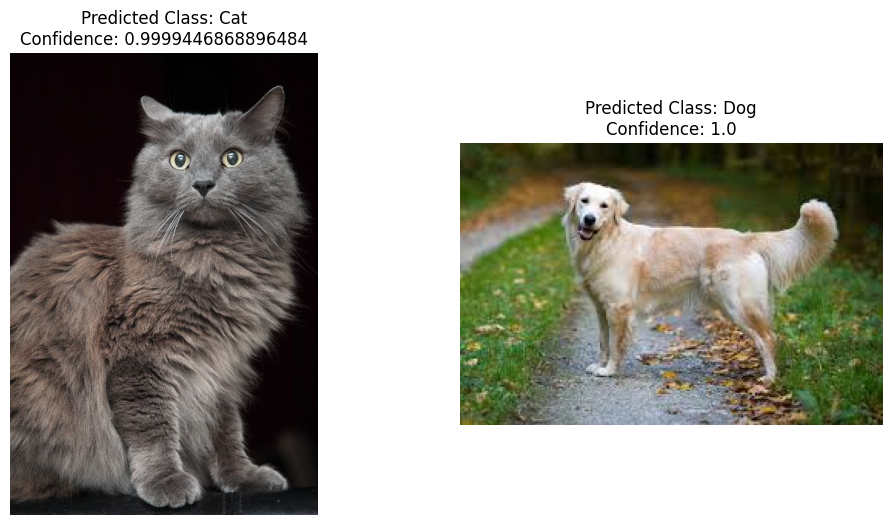

In [36]:
plot_image_with_predictions("/content/cat.jpg", "/content/dog.jpg")


0: 384x640 1 cat, 2 dogs, 1 bed, 326.5ms
Speed: 3.6ms preprocess, 326.5ms inference, 18.0ms postprocess per image at shape (1, 3, 384, 640)


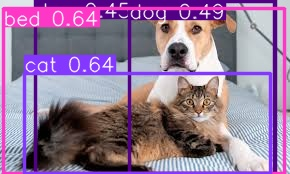

In [29]:

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # This will automatically download the model weights

# Perform inference
source_img = cv2.imread('/content/images.jpg')
results = model(source_img)

# Visualize the results on the frame
annotated_frame = results[0].plot()

# Guardamos el resultado en JPG
cv2.imwrite('/content/images.jpg', annotated_frame)

# Mostramos el resultado en Colab
Image('/content/images.jpg')